In [63]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np

def offeredTraffic(calls_per_hour, hours_per_call): # A0
    return calls_per_hour*hours_per_call

def calc_erlangb(n, A0):
    denom = 0
    for i in range(n+1):
        denom += (A0**i)/(factorial(i))
    E1 = ((A0**n)/factorial(n))/denom
    return E1

In [59]:
def trafficSimulation(n_channels, numCalls, meanCallDuration):

    callDurations = np.random.exponential(scale=meanCallDuration, size=numCalls)
    # print("Mean call duration =",callDurations.mean())
    # plt.hist(callDurations, bins=numCalls//10)
    # plt.show()

    callStarts = np.random.uniform(size=numCalls)
    # plt.hist(callStarts, bins=numCalls//10)
    # plt.show()
    callStarts.sort()

    # Calls = Numpy array of [[call0_start call0_end]; [call1_start call1_end];...
    calls = np.stack((callStarts, np.add(callStarts,callDurations)),axis=1)

    # plt.hist(load, bins=1000)
    # plt.plot(calls)
    # plt.show()
    
    channels = np.zeros(n_channels)
    
    time = 0
    callsSucceeded = 0
    for i, call in enumerate(calls):
        time = call[0]
        channelFound = False
        for j in range(n):
            if not(channelFound):
                if channels[j] < time:
                    # print(j,"used")
                    # print("Channel {} free. Adding call time {}".format(j, call[1]))
                    channels[j] = call[1]
                    channelFound = True
        if channelFound:
            callsSucceeded += 1
        # else:
        #     print("Call {} failed.".format(i))
    # print(time, call, channels)
    callsFailed = numCalls - callsSucceeded
    # print("{}% of calls failed ({} succeeded, {} failed).".format(100*callsFailed/numCalls, callsSucceeded, callsFailed))
    return callsFailed/numCalls, callsFailed


In [79]:
meanCallDuration = 3/60 # 3 mins in hrs
n = 56

minNumCalls = 1
maxNumCalls = 2000
numTests = 21
simulationCallAmounts = np.concatenate((np.linspace(minNumCalls, maxNumCalls, numTests), np.linspace(2500, 6000, 8))).astype(np.int)

GOS_erlang = np.zeros(simulationCallAmounts.shape)
GOS_simulated = np.zeros(simulationCallAmounts.shape)

repetitionsPerSimulation = 100
print(simulationCallAmounts)

[   1  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2500 3000 3500 4000 4500 5000 5500
 6000]


In [80]:
for i, numCalls in enumerate(simulationCallAmounts):
    # print("{} - For {} calls in a network with {} channels:".format(i, numCalls, n))
    erlangb = calc_erlangb(n, offeredTraffic(numCalls, meanCallDuration))
    GOS_erlang[i] = erlangb*100
    # print("Erlang B = {}".format(GOS_erlang[i]))

    totalFailRate, totalFailCount = 0, 0
    for j in range(repetitionsPerSimulation):
        failRate, failsCount = trafficSimulation(n, numCalls, meanCallDuration)
        totalFailRate += failRate
        totalFailCount += failsCount
    meanFailRate = totalFailRate/repetitionsPerSimulation
    meanFailCount = totalFailCount/repetitionsPerSimulation
    GOS_simulated[i] = meanFailRate*100
    # print("Call fail rate in {} simulations = {}% (mean of {} fails in {} calls)\n".format(repetitionsPerSimulation, GOS_simulated[i], meanFailCount, numCalls))

print("Erlang B:\t\t\t Simulation:")
for i, numCalls in enumerate(simulationCallAmounts):
    print(GOS_erlang[i], "\t\t", GOS_simulated[i])

Erlang B:			 Simulation:
1.8566788086776723e-146 		 0.0
1.3151615251769238e-36 		 0.0
6.385375518487678e-22 		 0.0
3.124816653120434e-14 		 0.0
2.088917946175988e-09 		 0.0
3.7619213572169347e-06 		 0.0
0.0006887954565103885 		 0.0
0.026049792950441446 		 0.012857142857142857
0.31230359659050694 		 0.15500000000000005
1.606215582800639 		 1.2644444444444443
4.579243154113578 		 4.009999999999999
8.963454139899877 		 8.348181818181818
13.991955091611146 		 12.728333333333333
19.06763820083701 		 17.32461538461539
23.88602534083741 		 21.669285714285714
28.331718872947242 		 26.494666666666667
32.38270104833483 		 30.63437500000001
36.05715176242658 		 34.54999999999999
39.388016641501636 		 37.41055555555554
42.4116229930078 		 40.58157894736843
45.16288022045591 		 43.21200000000002
55.818229671802186 		 54.0848
63.05113198840972 		 61.536666666666676
68.26254233657643 		 66.92714285714285
72.19081640498085 		 71.02424999999998
75.25612381138117 		 74.24355555555555
77.71396399637605 	

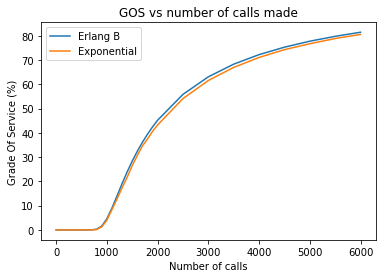

In [81]:
# print("Erlang B:\t\t\t Simulation:")
# for i, numCalls in enumerate(simulationCallAmounts):
#     print(GOS_erlang[i], "\t\t", GOS_simulated[i])

plt.plot(simulationCallAmounts, GOS_erlang, label='Erlang B')
plt.plot(simulationCallAmounts, GOS_simulated, label='Exponential')
plt.xlabel('Number of calls')
plt.ylabel('Grade Of Service (%)')
plt.title("GOS vs number of calls made")
plt.legend()
plt.show()